## TP2 (creation de dataset)
##    GROUPE 3 CONSTITUE DE :
##        - LEPAFO MOFFO Baurel               21S2782
##        - MANFOUO SELATSA Ridano            16U2848
##        - TEINGA KAMGUEN Emmanuel Rufin     21S2822
##        - MEBODO ONOMO JUSTIN JORDAN        19M2217


In [1]:
# Generer De Dataset en python

# creation d'un Simple exemple de donnees climatique pour les villes d'allemagne

import numpy as np
import pandas as pd

cities= ['Berlin','Frankfurt','Hamburg',
        'Nuremberg', 'Munich', 'Stuttgart',
        'Hanover', 'Saarbruecken', 'Cologne',
        'Constance', 'Freiburg', 'Karlsruhe']

n= len(cities)
data = {'Temparature':np.random.normal(24,3,n),
         'Himidity' :np.random.normal(78,2.5,n),
         'Wind':np.random.normal(15,4,n)
       }

df = pd.DataFrame(data=data,index=cities)

In [2]:
df

,Temparature,Himidity,Wind
Berlin,19.955589,84.232004,13.688682
Frankfurt,27.496302,80.023616,10.152986
Hamburg,28.427412,79.196095,12.237274
Nuremberg,29.537846,74.879734,13.631137
Munich,25.523146,74.331558,11.377993
Stuttgart,29.622211,72.987975,22.721668
Hanover,20.338758,79.908402,13.793416
Saarbruecken,21.750387,74.138211,14.249689
Cologne,24.616355,76.602119,15.782838
Constance,24.988652,76.400877,17.920550


In [3]:
## Autre exemple de creation de data set
""" ici on vas creer des donnees artificielle pour 4 type de fleur non existant
## ce sont entre autre: Flos Pythonem, Flos Java, Flos Margarita, Flos Artificialis

ces dernieres ont les couleurs RGB suivantes
    (255,0,0)
    (245,107,0)
    (206,99,1)
    (255,254,101)
 
 diametre respectifs de calice:
     3.8
     3.3
     4.1
     2.9
"""

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from scipy.stats import truncnorm

def truncated_normal(mean=0,sd=1, low=0,upp = 10,type=int):
    return truncnorm((low-mean)/sd, (upp-mean)/sd, loc=mean, scale=sd)

def truncated_normal_floats(mean= 0,sd=1,low=0, upp=10,num=100):
    res = truncated_normal(mean=mean,sd=sd,low=low,upp=upp)
    return res.rvs(num)

def truncated_normal_ints(mean=0,sd=1,low=0,upp=10,num=100):
    res = truncated_normal(mean=mean,sd=sd,low=low,upp=upp)
    return res.rvs(num).astype(np.uint8)

#nombre d'items pour chaque type de fleur:
number_of_items_per_class= [190,205,230,170]
flowers = {}
# generation des fleurs flos pythonem:
number_of_items = number_of_items_per_class[0]
reds = truncated_normal_ints(mean=254, sd = 18, low=235,upp=256,num = number_of_items)
greens = truncated_normal_ints(mean = 107,sd = 11, low=88,upp=127, num=number_of_items)
blues = truncated_normal_ints(mean=0,sd=15,low=0,upp=20, num=number_of_items)
calyx_dia = truncated_normal_floats(3.8,0.3,3.4,4.2,num=number_of_items)
data = np.column_stack((reds,greens,blues,calyx_dia))
flowers["flos_pythonem"] = data

## generation de flos Jave:

number_of_items = number_of_items_per_class[1]
reds = truncated_normal_ints(mean=245, sd=17, low=226, upp=256,num=number_of_items)
greens = truncated_normal_ints(mean=107, sd=11, low=88, upp=127,num=number_of_items)
blues = truncated_normal_ints(mean=0, sd=10, low=0, upp=20,num=number_of_items)
calyx_dia = truncated_normal_floats(3.3, 0.3, 3.0, 3.5,num=number_of_items)
data = np.column_stack((reds, greens, blues, calyx_dia))

flowers["flos_java"] = data

# generation de fleur de  type flos Java:

number_of_items = number_of_items_per_class[2]
reds = truncated_normal_ints(mean=206, sd=17, low=175, upp=238,num=number_of_items)
greens = truncated_normal_ints(mean=99, sd=14, low=80, upp=120,num=number_of_items)
blues = truncated_normal_ints(mean=1, sd=5, low=0, upp=12,num=number_of_items)
calyx_dia = truncated_normal_floats(4.1, 0.3, 3.8, 4.4,num=number_of_items)
data = np.column_stack((reds, greens, blues, calyx_dia))

flowers["flos_margarita"] = data

# Generation de fleurs de types flos artificialis:

number_of_items = number_of_items_per_class[3]
reds = truncated_normal_ints(mean=255, sd=8, low=2245, upp=2255,num=number_of_items)
greens = truncated_normal_ints(mean=254, sd=10, low=240, upp=255,num=number_of_items)
blues = truncated_normal_ints(mean=101, sd=5, low=90, upp=112,num=number_of_items)
calyx_dia = truncated_normal_floats(2.9, 0.4, 2.4, 3.5,num=number_of_items)
data = np.column_stack((reds, greens, blues, calyx_dia))
flowers["flos_artificialis"] = data

## creation d'un tableau de donnees pour nos fleurs

data = np.concatenate((flowers["flos_pythonem"],flowers["flos_java"],flowers["flos_margarita"],flowers["flos_artificialis"]), axis=0)

# assignation de classe a chaque fleur
target = np.zeros(sum(number_of_items_per_class)) # nombres de classe de fleur
previous_end = 0

for i in range(1,5):
    num = number_of_items_per_class[i-1]
    beg = previous_end
    target[beg: beg + num] += i
    previous_end = beg + num
    
    
conc_data = np.concatenate((data, target.reshape(target.shape[0],1)),axis=1)
np.savetxt("data/strange_flowers.txt", conc_data, fmt="%2.2f",)


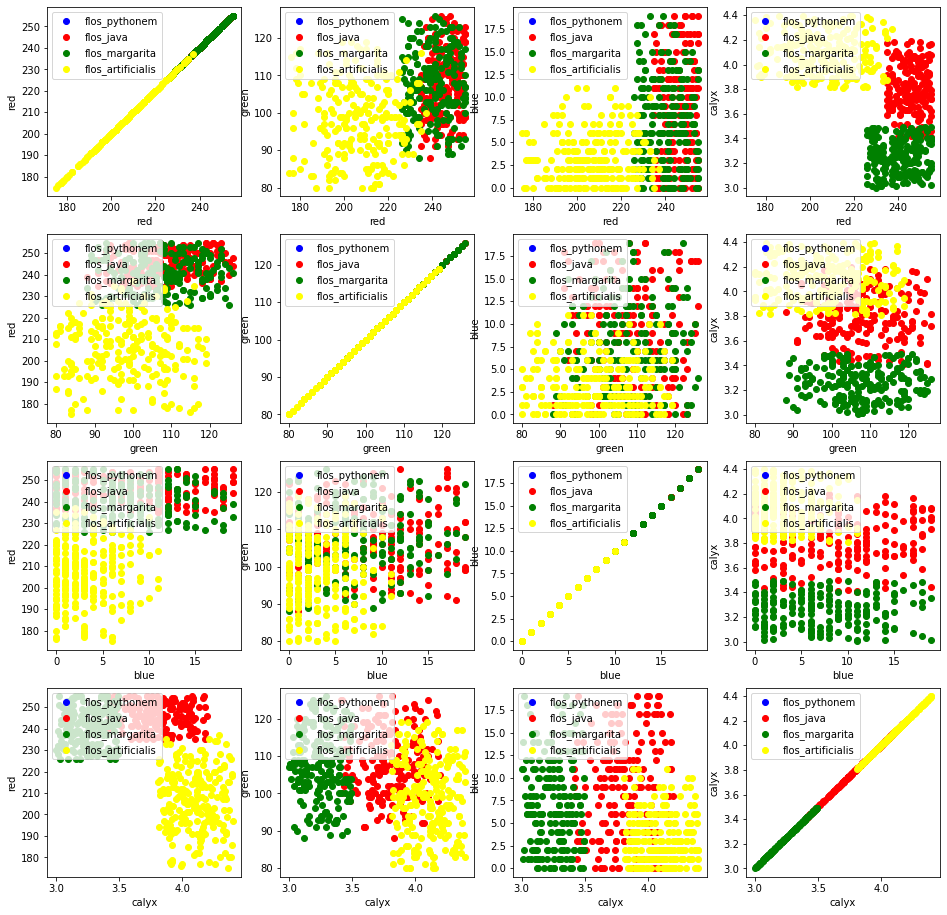

In [4]:
import matplotlib.pyplot as plt
target_names = list(flowers.keys())
feature_names = ['red', 'green', 'blue', 'calyx']
n = 4
fig, ax = plt.subplots(n, n, figsize=(16, 16))
colors = ['blue', 'red', 'green', 'yellow']
for x in range(n):
    for y in range(n):
        xname = feature_names[x]
        yname = feature_names[y]
        for color_ind in range(len(target_names)):
            ax[x, y].scatter(data[target==color_ind, x],data[target==color_ind, y],label=target_names[color_ind],c=colors[color_ind])
            ax[x, y].set_xlabel(xname)
            ax[x, y].set_ylabel(yname)
            ax[x, y].legend(loc='upper left')
plt.show()

In [5]:
## Creation D'un dataset synthetique avec 

from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import numpy as np
data, labels = make_blobs(n_samples=1000,
#centers=n_classes,
centers=np.array([[2, 3], [4, 5], [7,9]]),random_state=1)

labels = labels.reshape((labels.shape[0],1))
all_data = np.concatenate((data, labels), axis=1)
all_data[:10]
np.savetxt("data/squirrels.txt", all_data)
all_data[:10]

array([[ 1.72415394,  4.22895559,  0.        ],
       [ 4.16466507,  5.77817418,  1.        ],
       [ 4.51441156,  4.98274913,  1.        ],
       [ 1.49102772,  2.83351405,  0.        ],
       [ 6.0386362 ,  7.57298437,  2.        ],
       [ 5.61044976,  9.83428321,  2.        ],
       [ 5.69202866, 10.47239631,  2.        ],
       [ 6.14017298,  8.56209179,  2.        ],
       [ 2.97620068,  5.56776474,  1.        ],
       [ 8.27980017,  8.54824406,  2.        ]])

In [6]:
## lire les donnees et la conversion revient sous la forme: Donnees et label
file_data = np.loadtxt("squirrels.txt")
data = file_data[:,:-1]
labels = file_data[:,2:]
labels = labels.reshape((labels.shape[0]))

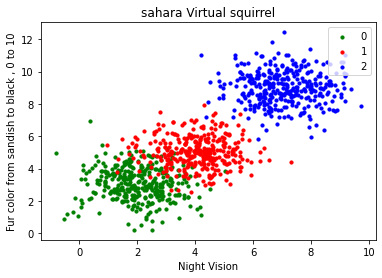

In [7]:
import matplotlib.pyplot as plt
colours = ('green','red','blue','magenta','yellow','cyan')
n_classes = 3

fig, ax = plt.subplots()
for n_class in range(0, n_classes):
    ax.scatter(data[labels==n_class,0], data[labels == n_class,1], c=colours[n_class],s=10, label=str(n_class))

ax.set(xlabel ='Night Vision',
       ylabel = 'Fur color from sandish to black , 0 to 10',
      title = 'sahara Virtual squirrel')
ax.legend(loc='upper right')

In [8]:
from sklearn.model_selection import train_test_split

data_sets =  train_test_split(data,
                             labels,
                             train_size = 0.8,
                             test_size=0.2,
                             random_state=42 #meme nombre de sortie pour toutes les etapes
                            )
train_data,test_data,train_labels,test_labels = data_sets

In [9]:
## importation du modele knn
from sklearn.neighbors import KNeighborsClassifier

#creation du classifier
knn = KNeighborsClassifier(n_neighbors=8)
#entrainnement
knn.fit(train_data,train_labels)

# test sur les donnees de test:

calculated_labels = knn.predict(test_data)
calculated_labels

array([2., 0., 1., 1., 0., 1., 2., 2., 2., 2., 0., 1., 0., 0., 1., 0., 1.,
       2., 0., 0., 1., 2., 1., 2., 2., 1., 2., 0., 0., 2., 0., 2., 2., 0.,
       0., 2., 0., 0., 0., 1., 0., 1., 1., 2., 0., 2., 1., 2., 1., 0., 2.,
       1., 1., 0., 1., 2., 1., 0., 0., 2., 1., 0., 1., 1., 0., 0., 0., 0.,
       0., 0., 0., 1., 1., 0., 1., 1., 1., 0., 1., 2., 1., 2., 0., 2., 1.,
       1., 0., 2., 2., 2., 0., 1., 1., 1., 2., 2., 0., 2., 2., 2., 2., 0.,
       0., 1., 1., 1., 2., 1., 1., 1., 0., 2., 1., 2., 0., 0., 1., 0., 1.,
       0., 2., 2., 2., 1., 1., 1., 0., 2., 1., 2., 2., 1., 2., 0., 2., 0.,
       0., 1., 0., 2., 2., 0., 0., 1., 2., 1., 2., 0., 0., 2., 2., 0., 0.,
       1., 2., 1., 2., 0., 0., 1., 2., 1., 0., 2., 2., 0., 2., 0., 0., 2.,
       1., 0., 0., 0., 0., 2., 2., 1., 0., 2., 2., 1., 2., 0., 1., 1., 1.,
       0., 1., 0., 1., 1., 2., 0., 2., 2., 1., 1., 1., 2.])

In [10]:
from sklearn import metrics

print("Accuracy:",metrics.accuracy_score(test_labels,calculated_labels))

Accuracy: 0.97


In [11]:
# autre importantes distribution

import numpy as np
import sklearn.datasets as ds
data, labels = ds.make_moons(n_samples=150,
                             shuffle = True,
                             noise=0.19,
                             random_state=None)
data += np.array(-np.ndarray.min(data[:,0]),
                 -np.ndarray.min(data[:,1]))

np.ndarray.min(data[:,0]),np.ndarray.min(data[:,1])

(0.0, 0.4813989909760509)

[Text(0, 0.5, 'Y'), Text(0.5, 0, 'X'), Text(0.5, 1.0, 'Moons')]

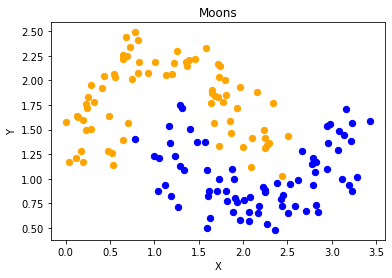

In [12]:
import matplotlib.pyplot as plt
fig,ax = plt.subplots()
ax.scatter(data[labels==0,0], data[labels==0, 1],
            c='orange', s=40,label='oranges')
ax.scatter(data[labels==1 ,0], data[labels==1,1],
            c ='blue',s=40,label='blues')
ax.set(xlabel='X',
       ylabel='Y',
       title ='Moons')

In [13]:
min_x_new,max_x_new = 33, 88
min_y_new,max_y_new = 12, 20

data, labels = ds.make_moons(n_samples=100,
                             shuffle = True,
                             noise= 0.05,
                             random_state=None)

min_x, min_y = np.ndarray.min(data[:,0]), np.ndarray.min(data[:,1])
max_x,max_y = np.ndarray.max(data[:,0]),np.ndarray.max(data[:,1])

data -= np.array([min_x, min_y])
data *= np.array([(max_x_new- min_x_new)/(max_x - min_x),(max_y_new-min_y_new)/(max_y -min_y)])
data += np.array([min_x_new, min_y_new])
data[:6]

array([[50.05834081, 20.        ],
       [53.82850326, 19.95552881],
       [34.89417879, 15.41586122],
       [37.16570727, 16.94362335],
       [65.82876023, 16.80721692],
       [66.91174279, 12.23290463]])

In [14]:
# mise sur echelle de valeur entre [min,max] en valeur entre [a,b] f(x) = [[(b-a).(x-min)]/(max-min)] +a

def scale_data(data,new_limits,inplace=False):
    if not inplace:
        data = data.copy()
    min_x, min_y = np.ndarray.min(data[:,0]),np.ndarray.min(data[:,1])
    max_x,max_y = np.ndarray.max(data[:,0]),np.ndarray.max(data[:,1])
    min_x_new,max_x_new = new_limits[0]
    min_y_new,max_y_new = new_limits[1]
    data -= np.array([min_x,min_y])
    data *= np.array([(max_x_new -min_x_new) / (max_x - min_x),(max_y_new - min_y_new)/(max_y - min_y)])
    data += np.array([min_x_new,min_y_new])
    
    if inplace:
        return None
    else:
        return data
    
data,labels = ds.make_moons(n_samples=100,
                                shuffle =True,
                                noise= 0.05,
                                random_state = None)
scale_data(data,[(1,4),(3,8)], inplace =True)
data[:10]

array([[3.68483208, 3.8395849 ],
       [3.45018168, 3.440761  ],
       [3.73392473, 4.44385254],
       [1.63249488, 7.43341677],
       [1.50436153, 7.72344206],
       [2.61701528, 3.67827998],
       [2.76684579, 3.32697012],
       [1.13987244, 6.23994573],
       [3.50425526, 3.80278534],
       [3.78704926, 4.43894042]])

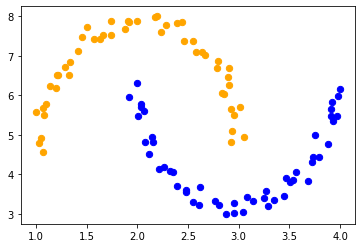

In [15]:
## presentation graphique des donnees
fig, ax = plt.subplots()

ax.scatter(data[labels == 0,0], data[labels==0,1],
           c='orange', s=40,label='oranges')
ax.scatter(data[labels == 1,0], data[labels==1,1],
           c='blue', s=40,label='blues')

In [16]:
import sklearn.datasets as ds

data,labels = ds.make_circles(n_samples=100,shuffle=True,noise=0.05, random_state=None)

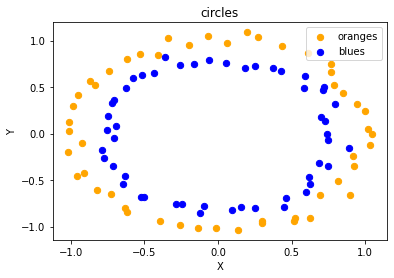

In [17]:
# representation graphique circulaires des donnees
fig,ax = plt.subplots()

ax.scatter(data[labels==0,0], data[labels==0,1], c='orange', s=40, label= 'oranges')
ax.scatter(data[labels==1,0], data[labels==1,1], c='blue', s=40, label= 'blues')
ax.set(xlabel = 'X',
       ylabel = 'Y',
      title = 'circles')

ax.legend(loc = 'upper right')

 ici on vas creer des donnees artificielle pour 4 type de fleur non existant
## ce sont entre autre: Flos Pythonem, Flos Java, Flos Margarita, Flos Artificialis

ces dernieres ont les couleurs RGB suivantes
    (255,0,0)
    (245,107,0)
    (206,99,1)
    (255,254,101)
 
 diametre respectifs de calice:
     3.8
     3.3
     4.1
     2.9



<ipython-input-18-9d8f89d0f361>:30: MatplotlibDeprecationWarning: Support for uppercase single-letter colors is deprecated since Matplotlib 3.1 and will be removed in 3.3; please use lowercase instead.
  plt.scatter(X1[:,0],X1[:,1], marker='o',c=Y1, s=25,edgecolor = 'K')


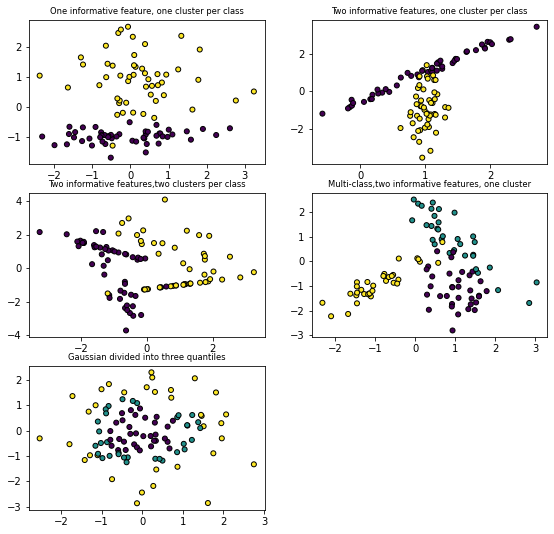

In [18]:
print(__doc__)
import matplotlib.pyplot as plt

from sklearn.datasets import make_classification
from sklearn.datasets import make_blobs
from sklearn.datasets import make_gaussian_quantiles

plt.figure(figsize=(8,8))
plt.subplots_adjust(bottom=.05,top=.9,left=.05,right=.95)
plt.subplot(321)
plt.title("One informative feature, one cluster per class",fontsize='small')
X1,Y1 = make_classification(n_features = 2,n_redundant=0,n_informative=1,n_clusters_per_class=1)
plt.scatter(X1[:,0],X1[:,1], marker='o',c=Y1,s=25,edgecolor="k")
plt.subplot(322)
plt.title("Two informative features, one cluster per class", fontsize = 'small')
X1,Y1 = make_classification(n_features = 2,n_redundant=0,n_informative=2,n_clusters_per_class=1)
plt.scatter(X1[:,0],X1[:,1], marker='o', c=Y1,s=25,edgecolor='k')
plt.subplot(323)
plt.title('Two informative features,two clusters per class',fontsize='small')
X2,Y2 =make_classification(n_features=2,n_redundant=0,n_informative=2)
plt.scatter(X2[:,0], X2[:,1],marker ='o', c=Y2,s=25,edgecolor='k')
plt.subplot(324)
plt.title("Multi-class,two informative features, one cluster",
         fontsize= 'small')
X1,Y1 = make_classification(n_features=2,
                            n_redundant=0,
                            n_informative=2,
                            n_clusters_per_class=1,
                            n_classes = 3)
plt.scatter(X1[:,0],X1[:,1], marker='o',c=Y1, s=25,edgecolor = 'K')
plt.subplot(325)
plt.title('Gaussian divided into three quantiles', fontsize='small')
X1,Y1 = make_gaussian_quantiles(n_features= 2,n_classes=3)
plt.scatter(X1[:,0],X1[:,1], marker ='o', c=Y1, s=25, edgecolor='k')
plt.show()

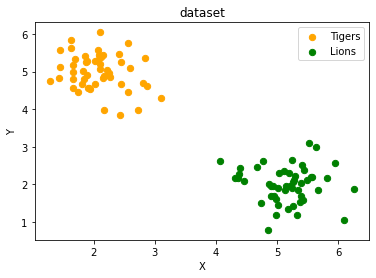

In [22]:
# exercice numero 1
## a)creation de 2 ensemble de test qui son separable par un perceptron sans le noeud de bias
donnees,labels = make_blobs(n_samples=100,
                            cluster_std=0.5,
                            centers =[[2,5],[5,2]],
                            random_state =1)
fig,ax= plt.subplots()
couleurs = ['orange','green']
nom_label=['Tigers',"Lions"]

for label in range(0,2):
    ax.scatter(donnees[labels==label,0], donnees[labels==label,1],
               c=couleurs[label],s=40,label=nom_label[label])
ax.set(xlabel='X',ylabel='Y',title='dataset')
ax.legend(loc='upper right')

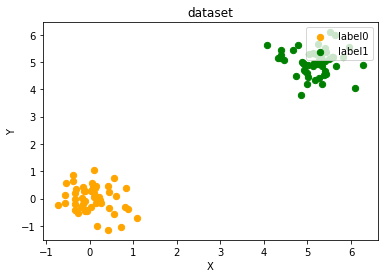

In [30]:
## b)creation de 2 ensemble de test qui ne sont pas separable par une droite passant par l'origne
donnees,labels= make_blobs(n_samples=100,cluster_std = 0.5,centers=[[0,0],[5,5]], random_state=1)
fig,ax=plt.subplots()

couleurs = ["orange",'green']
label_name = ["label0","label1"]
for label in range(0,2):
    ax.scatter(donnees[labels==label,0], donnees[labels==label,1],
               c=couleurs[label],s=40,label=label_name[label])

ax.set(xlabel='X',ylabel='Y',title='dataset')
ax.legend(loc='upper right')

In [31]:
## c)creation d'un dataset a 5 classes correspondant au graphe du document d'Esxercice 
import sklearn.datasets as ds

donnees, labels = ds.make_circles(n_samples =100,
                                  shuffle = True,
                                  noise =0.05,
                                  random_state =42)
centers=[[3,4],[5,3],[4.5,6]]
data2,labels2= make_blobs(n_samples=100,
                          cluster_std=0.5,
                          centers=centers,
                          random_state=1)
for i in range(len(centers)-1,-1,-1):
    labels2[labels2==0+i] = i+2

print(labels2)
labels = np.concatenate([labels,labels2])
data=data *[1.2,1.8] +[3,4]
data = np.concatenate([data,data2],axis=0)

[2 4 4 3 4 4 3 3 2 4 4 2 4 4 3 4 2 4 4 4 4 2 2 4 4 3 2 2 3 2 2 3 2 3 3 3 3
 3 4 3 3 2 3 3 3 2 2 2 2 3 4 4 4 2 4 3 3 2 2 3 4 4 3 3 4 2 4 2 4 3 3 4 2 2
 3 4 4 2 3 2 3 3 4 2 2 2 2 3 2 4 2 2 3 3 4 4 2 2 4 3]


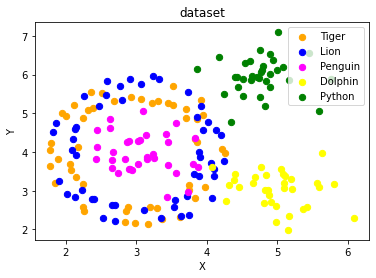

In [33]:
fig,ax=plt.subplots()
colours = ["orange", "blue", "magenta", "yellow", "green"]
label_name = ["Tiger", "Lion", "Penguin", "Dolphin", "Python"]

for label in range(0, len(centers) +2):
    ax.scatter(data[labels == label,0],data[labels == label,1],
               c= colours[label], s=40, label=label_name[label])
ax.set(xlabel = 'X',ylabel='Y',title='dataset')
ax.legend(loc='upper right')